In [2]:
import networkx as nx
import csv
import pandas as pd
import itertools

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


In [3]:
#creazione dataframe con nodi e archi
path1 = "marvel-unimodal-nodes.csv"
nodes = pd.read_csv(path1)
nodes.head()

,Id,Label
0,Black Panther / T'chal,Black Panther / T'chal
1,Loki [asgardian],Loki [asgardian]
2,Mantis / ? Brandt,Mantis / ? Brandt
3,Iceman / Robert Bobby,Iceman / Robert Bobby
4,Marvel Girl / Jean Grey,Marvel Girl / Jean Grey


In [4]:
path2 = "marvel-unimodal-edges.csv"
edges = pd.read_csv(path2)
edges.head()

,Source,Target,Weight
0,Black Panther / T'chal,Loki [asgardian],10
1,Black Panther / T'chal,Mantis / ? Brandt,23
2,Black Panther / T'chal,Iceman / Robert Bobby,12
3,Black Panther / T'chal,Marvel Girl / Jean Grey,10
4,Black Panther / T'chal,Cyclops / Scott Summer,14


In [5]:
H = nx.Graph()

for idx, row in nodes.iterrows():
    H.add_node(row['Id'])
    
for idx, row in edges.iterrows():
    H.add_edge(row['Source'], row['Target'], weight = row['Weight'])
    
print("Numero di nodi:", H.number_of_nodes())
print("Numero di archi:", H.number_of_edges())

if H.is_directed():
    print("Il grafo è diretto")
else:
    print("Il grafo è indiretto")

Numero di nodi: 327
Numero di archi: 9891
Il grafo è indiretto


# PROSSIMI PASSI

- sottografo dal grafo principale contenente nodi sopra una certa soglia di grado
- spring_layout, spyral_layout, Kamada_kaway_layout”

Numero di nodi: 107
Numero di archi: 3877


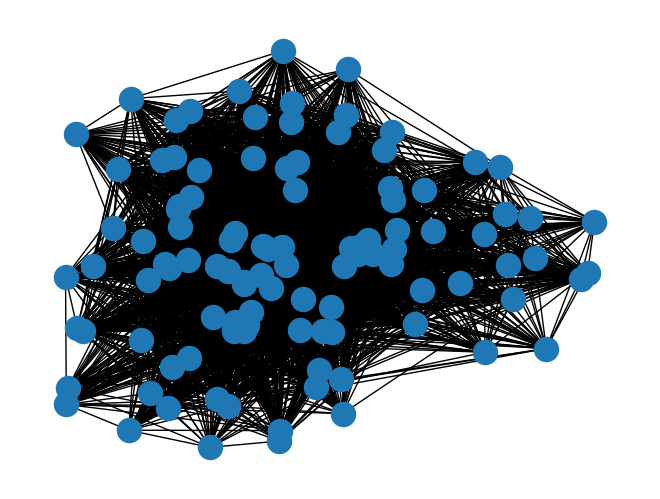

In [6]:
G = H.copy()

remove = [node for node,degree in dict(G.degree()).items() if degree < 60]
G.remove_nodes_from(remove)

print("Numero di nodi:", G.number_of_nodes())
print("Numero di archi:", G.number_of_edges())

nx.draw(G)

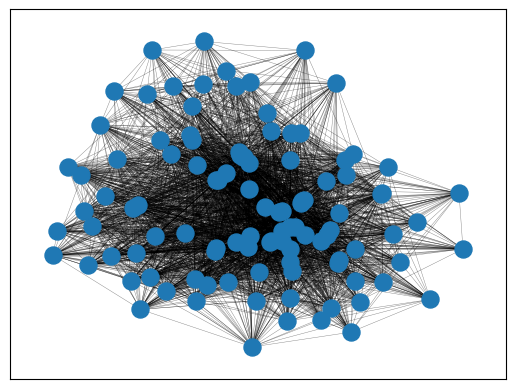

In [7]:
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=150)
plt.show()

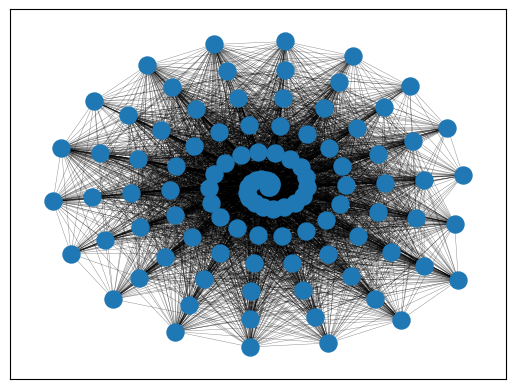

In [8]:
pos = nx.spiral_layout(G)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=150)
plt.show()

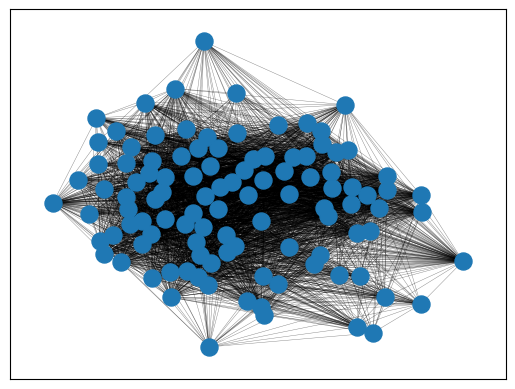

In [9]:
pos = nx.kamada_kawai_layout(H)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=150)
plt.show()

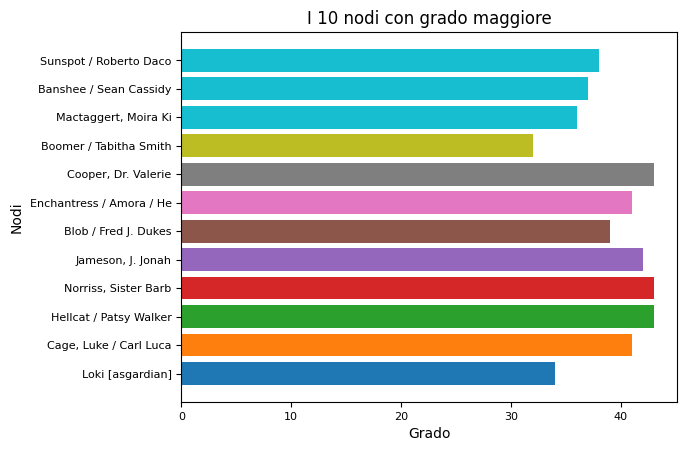

In [10]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=False)

top_10_nodes = [n for n, d in G.degree() if d in degree_sequence[:10]]
top_10_degrees = [G.degree(node) for node in top_10_nodes]

cmap = get_cmap("tab10")
plt.barh(top_10_nodes, top_10_degrees, color=cmap(range(len(top_10_nodes))))

plt.xlabel("Grado")
plt.xticks(fontsize=8)

plt.ylabel("Nodi")
plt.yticks(fontsize=8)
plt.title("I 10 nodi con grado maggiore")
plt.show()

# DEGREE CENTRALITY

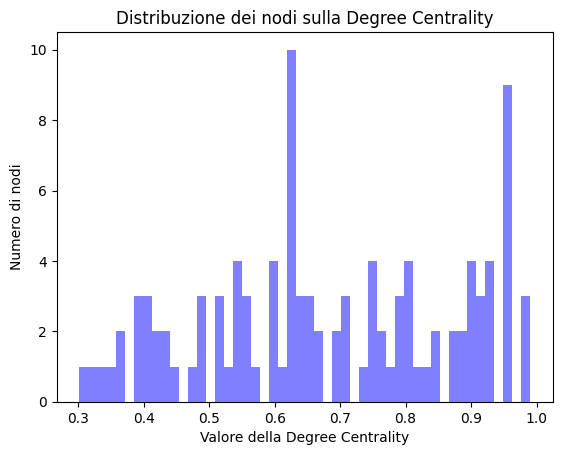

In [11]:
degree_centrality = nx.degree_centrality(G)

# Creiamo una lista dei valori di betweenness centrality dei nodi
values = list(degree_centrality.values())
values.sort(reverse=True)

# Disegniamo il grafico istogramma
plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Valore della Degree Centrality')
plt.ylabel('Numero di nodi')
plt.title('Distribuzione dei nodi sulla Degree Centrality')
plt.show()

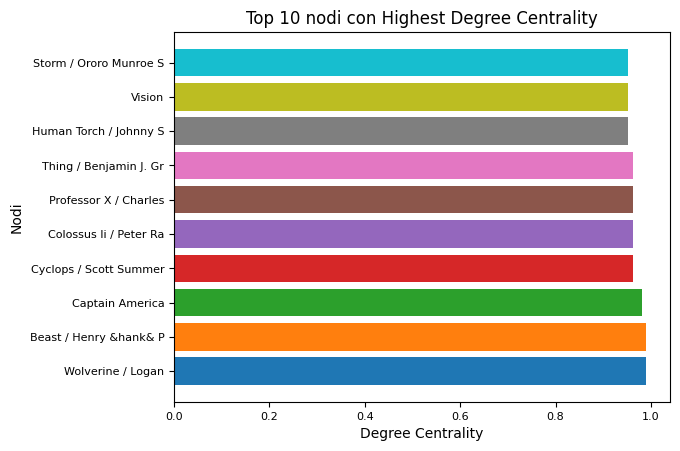

In [12]:
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

top_10_nodes = sorted_degree_centrality[:10]
top_10_values = [x[1] for x in top_10_nodes]
top_10_labels = [x[0] for x in top_10_nodes]

cmap = get_cmap("tab10")
plt.barh(top_10_labels, top_10_values, color=cmap(range(len(top_10_nodes))))

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Degree Centrality')
plt.xticks(fontsize=8)

plt.title('Top 10 nodi con Highest Degree Centrality')
plt.show()


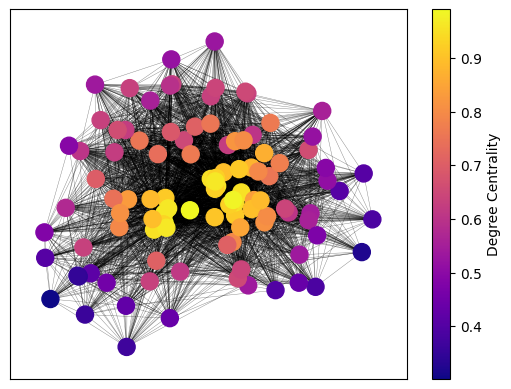

In [13]:
degree_centrality = nx.degree_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(degree_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Degree Centrality")
plt.show()


# BETWEENESS CENTRALITY

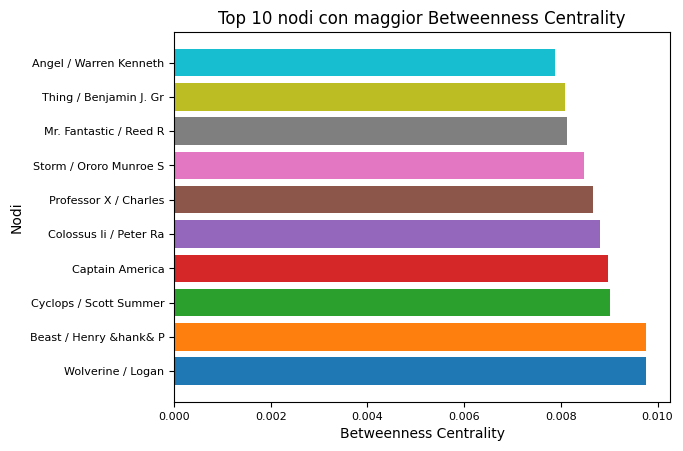

In [14]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

top_10_nodes = sorted_betweenness_centrality[:10]
top_10_values = [x[1] for x in top_10_nodes]
top_10_labels = [x[0] for x in top_10_nodes]

cmap = get_cmap("tab10")
plt.barh(top_10_labels, top_10_values, color=cmap(range(len(top_10_nodes))))

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Betweenness Centrality')
plt.xticks(fontsize=8)

plt.title('Top 10 nodi con maggior Betweenness Centrality')
plt.show()

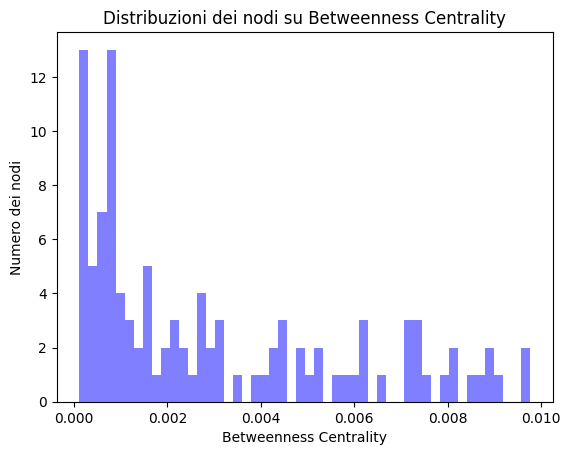

In [15]:
betweenness_centrality = nx.betweenness_centrality(G)

values = list(betweenness_centrality.values())
values.sort(reverse=True)

plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Numero dei nodi')
plt.title('Distribuzioni dei nodi su Betweenness Centrality')
plt.show()

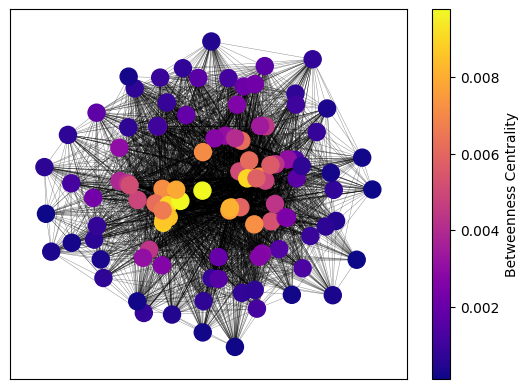

In [16]:
betweenness_centrality = nx.betweenness_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(betweenness_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Betweenness Centrality")
plt.show()

# CLOSENESS CENTRALITY

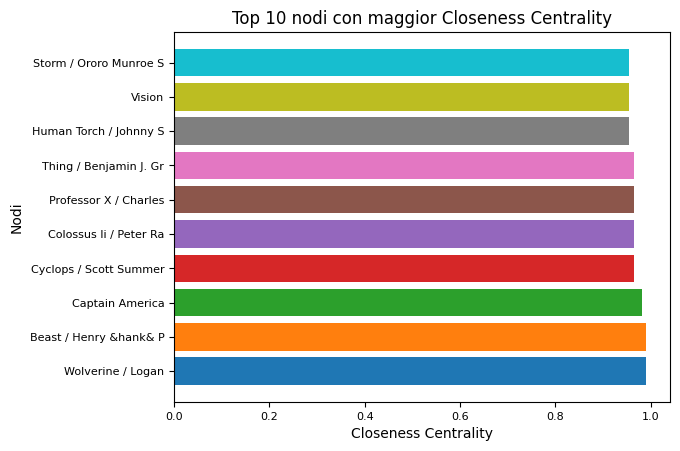

In [17]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

top_10_nodes = sorted_closeness_centrality[:10]
top_10_values = [x[1] for x in top_10_nodes]
top_10_labels = [x[0] for x in top_10_nodes]

cmap = get_cmap("tab10")
plt.barh(top_10_labels, top_10_values, color=cmap(range(len(top_10_nodes))))

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Closeness Centrality')
plt.xticks(fontsize=8)

plt.title('Top 10 nodi con maggior Closeness Centrality')
plt.show()

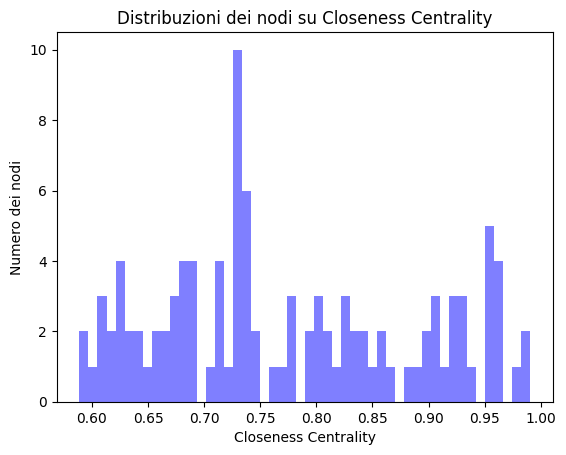

In [18]:
closeness_centrality = nx.closeness_centrality(G)

values = list(closeness_centrality.values())
values.sort(reverse=True)

plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Closeness Centrality')
plt.ylabel('Numero dei nodi')
plt.title('Distribuzioni dei nodi su Closeness Centrality')
plt.show()

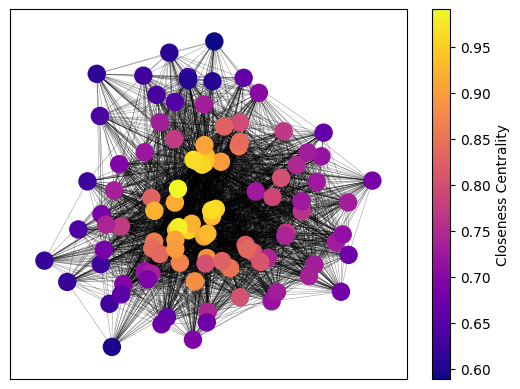

In [19]:
closeness_centrality = nx.closeness_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(closeness_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Closeness Centrality")
plt.show()

# EIGENVECTOR CENTRALITY

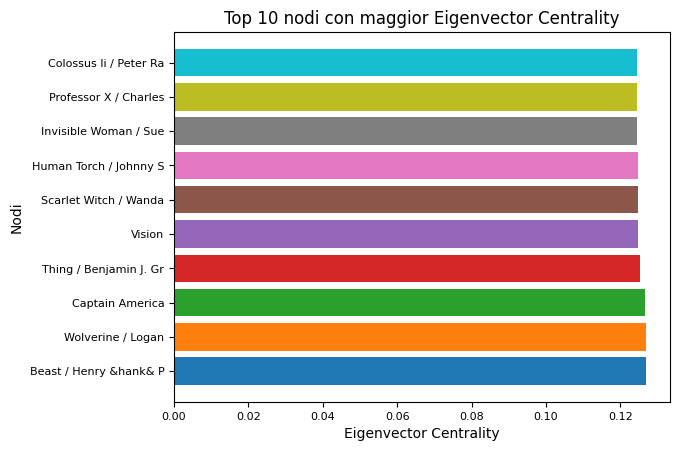

In [20]:
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

top_10_nodes = sorted_eigenvector_centrality[:10]
top_10_values = [x[1] for x in top_10_nodes]
top_10_labels = [x[0] for x in top_10_nodes]

cmap = get_cmap("tab10")
plt.barh(top_10_labels, top_10_values, color=cmap(range(len(top_10_nodes))))

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Eigenvector Centrality')
plt.xticks(fontsize=8)

plt.title('Top 10 nodi con maggior Eigenvector Centrality')
plt.show()

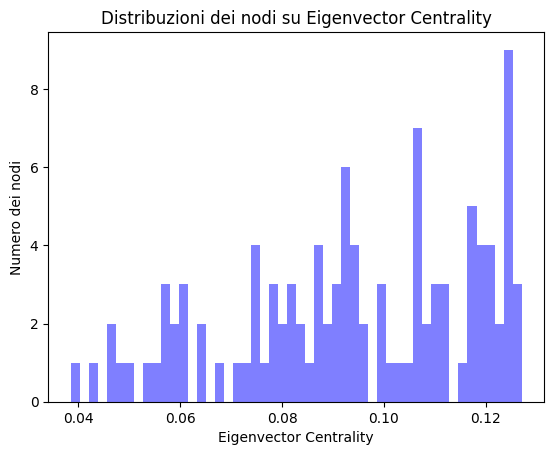

In [21]:
eigenvector_centrality = nx.eigenvector_centrality(G)

values = list(eigenvector_centrality.values())
values.sort(reverse=True)

plt.hist(values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Numero dei nodi')
plt.title('Distribuzioni dei nodi su Eigenvector Centrality')
plt.show()

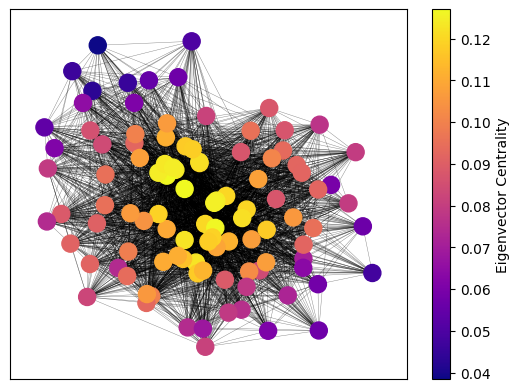

In [22]:
eigenvector_centrality = nx.eigenvector_centrality(G)
pos = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)
nodescatter = nx.draw_networkx_nodes(G, pos, node_color=list(eigenvector_centrality.values()), 
                                     cmap=plt.cm.plasma, node_size=150, alpha=1)

plt.colorbar(nodescatter, label="Eigenvector Centrality")
plt.show()

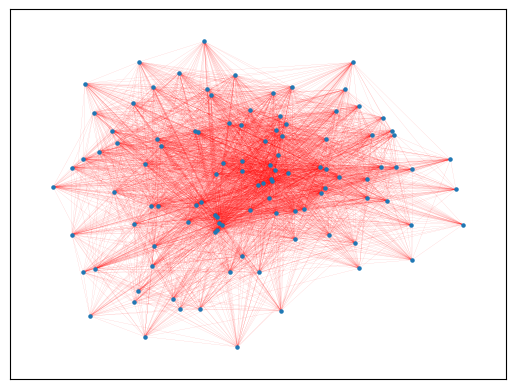

In [23]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=5)
nx.draw_networkx_edges(G, pos, edge_color='red', width=0.04)
plt.show()


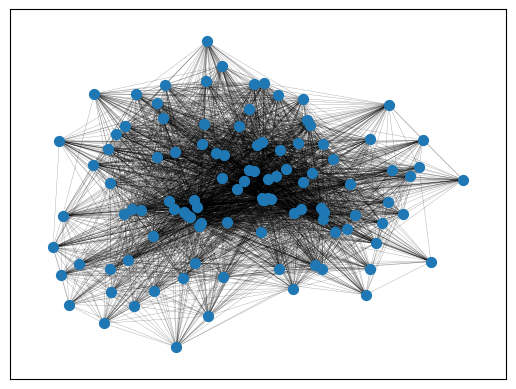

In [24]:
cliques = list(nx.find_cliques(G))

cliques_graph = G.subgraph(sum(cliques, []))
pos = nx.spring_layout(G) 

nx.draw_networkx_edges(cliques_graph, pos, alpha=0.5, width=0.2)
nx.draw_networkx_nodes(cliques_graph, pos, node_size=50)

plt.show()

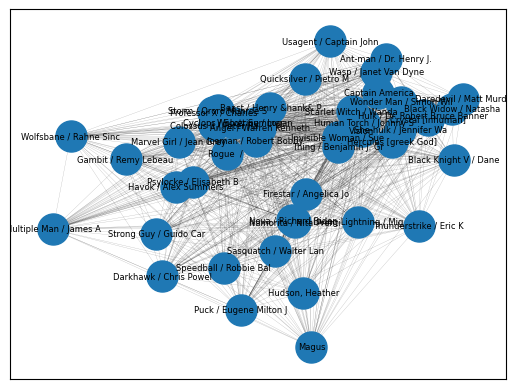

In [25]:
cliques = list(nx.find_cliques(G))
max_clique = max(cliques, key=len)

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=max_clique, node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=nx.subgraph(G, max_clique).edges, alpha=0.3, width=0.2)
nx.draw_networkx_labels(G, pos, labels={n:n for n in max_clique}, font_size=6)

plt.show()

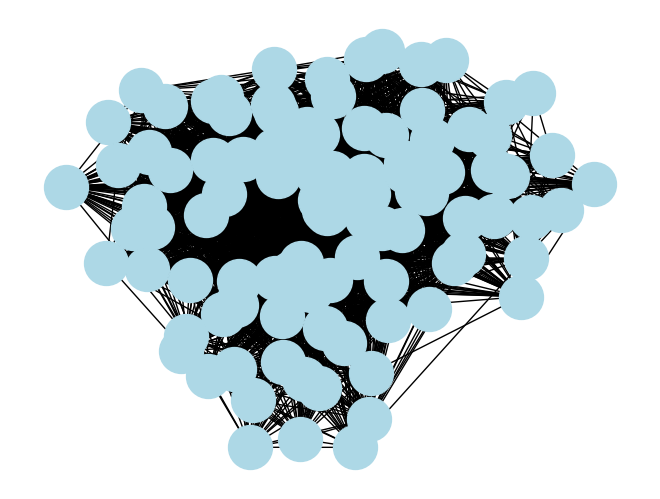

In [26]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='lightblue', node_size=1000, with_labels=False)
plt.show()

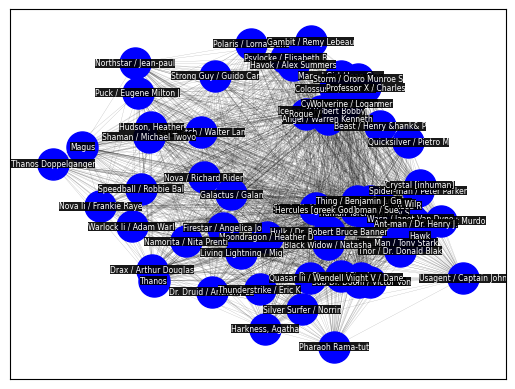

In [34]:
k_core = nx.k_core(G)

pos = nx.spring_layout(G)
nx.draw_networkx_edges(k_core, pos, alpha=0.3, width=0.2)
nx.draw_networkx_nodes(k_core, pos, node_size=500, node_color='b')

labels = {node: node for node in k_core.nodes()}
nx.draw_networkx_labels(k_core, pos, labels, font_color='white', font_size=5.5, font_family='sans-serif', 
                        font_weight='normal', alpha=1.0, 
                        bbox=dict(facecolor='black', edgecolor='none', alpha=0.9, pad=0), ax=None)

plt.show()

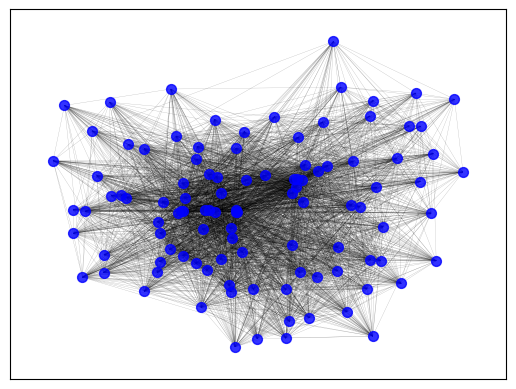

In [44]:
ego = nx.ego_graph(G, "Wolverine / Logan")

# Disegnare la rete ego
pos = nx.spring_layout(ego)
nx.draw_networkx_nodes(ego, pos, node_size=50, node_color='b', alpha=0.8)
nx.draw_networkx_edges(ego, pos, alpha=0.3, width=0.2)


plt.show()

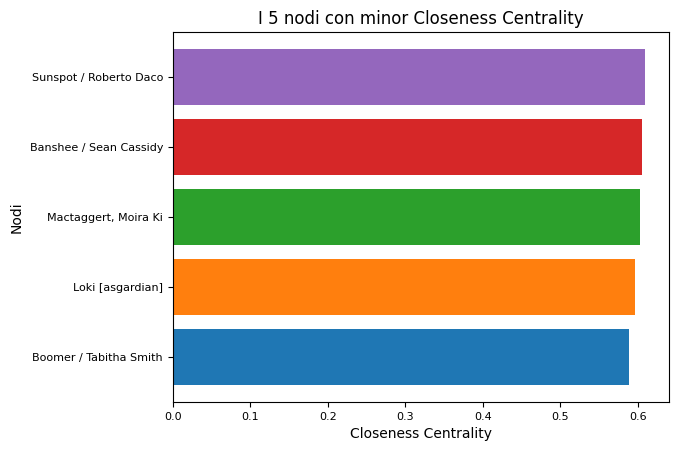

In [46]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=False)

bottom_5_nodes = sorted_closeness_centrality[:5]
bottom_5_values = [x[1] for x in bottom_5_nodes]
bottom_5_labels = [x[0] for x in bottom_5_nodes]

cmap = get_cmap("tab10")
plt.barh(bottom_5_labels, bottom_5_values, color=cmap(range(len(bottom_5_nodes))))

plt.ylabel('Nodi')
plt.yticks(fontsize=8)

plt.xlabel('Closeness Centrality')
plt.xticks(fontsize=8)

plt.title('I 5 nodi con minor Closeness Centrality')
plt.show()

In [48]:
shortest_path = nx.shortest_path(G, "Boomer / Tabitha Smith", "Sunspot / Roberto Daco")
print(shortest_path)

['Boomer / Tabitha Smith', 'Sunspot / Roberto Daco']
